In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

In [2]:
#acquire
df = acquire.get_store_item_demand_data()

#prepare
df = prepare.prep_store_data(df)
df.head(5)

,item_id,quantity,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,294.00


In [3]:
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

## Split the data

In [4]:
#look at the range of the index 
#four total years of data 
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

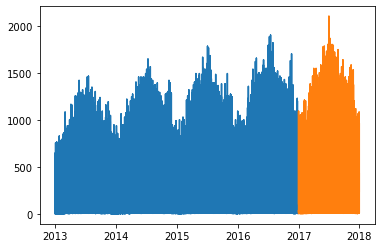

In [5]:
#train test split 
#75% train, 25% test 
#split the data with everything up to 2016 
#test is only 2017 
train = df[:'2016'] 
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

Key Takeaways:
- 3 years of training data, 1 year of test data
- Test data is most recent

In [6]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

In [7]:
train.groupby('month').describe()

item_id                                               quantity  \
          count  mean        std  min   25%   50%   75%   max    count   
month                                                                    
01-Jan  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
02-Feb  56500.0  25.5  14.430997  1.0  13.0  25.5  38.0  50.0  56500.0   
03-Mar  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
04-Apr  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
05-May  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
06-Jun  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
07-Jul  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
08-Aug  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
09-Sep  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
10-Oct  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
11-Nov  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
12-Dec  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   

                   ...    item_upc14               sales_total              \
             mean  ...           75%           max       count        mean   
month              ...                                                       
01-Jan  34.449081  ...  6.030842e+11  8.846237e+11     62000.0  185.232810   
02-Feb  38.138195  ...  6.030842e+11  8.846237e+11     56500.0  205.001723   
03-Mar  45.863145  ...  6.030842e+11  8.846237e+11     62000.0  246.694359   
04-Apr  53.293417  ...  6.030842e+11  8.846237e+11     60000.0  286.463914   
05-May  57.447597  ...  6.030842e+11  8.846237e+11     62000.0  308.932679   
06-Jun  61.038117  ...  6.030842e+11  8.846237e+11     60000.0  328.098415   
07-Jul  64.854839  ...  6.030842e+11  8.846237e+11     62000.0  348.595409   
08-Aug  57.326645  ...  6.030842e+11  8.846237e+11     62000.0  308.319972   
09-Sep  53.253233  ...  6.030842e+11  8.846237e+11     60000.0  286.252615   
10-Oct  49.618710  ...  6.030842e+11  8.846237e+11     62000.0  266.773078   
11-Nov  53.541983  ...  6.030842e+11  8.846237e+11     60000.0  287.761324   
12-Dec  37.994161  ...  6.030842e+11  8.846237e+11     62000.0  204.265461   

                                                           
               std   min     25%     50%     75%      max  
month                                                      
01-Jan  145.229766  0.00   66.23  159.40  268.15  1093.20  
02-Feb  160.234470  1.68   73.06  176.22  295.74  1065.87  
03-Mar  191.781349  3.00   89.10  212.39  354.38  1421.16  
04-Apr  222.392366  5.04  103.59  247.26  411.60  1658.02  
05-May  239.286350  5.04  112.40  267.24  444.86  1512.26  
06-Jun  253.623315  5.04  119.07  283.65  472.29  1667.13  
07-Jul  269.758461  5.88  126.36  301.32  503.40  1903.99  
08-Aug  238.639841  4.20  112.40  267.00  443.44  1557.81  
09-Sep  221.852486  4.20  103.62  247.59  411.60  1466.71  
10-Oct  207.425551  3.36   96.16  228.80  384.48  1430.27  
11-Nov  222.847403  4.20  104.16  248.40  414.70  1703.57  
12-Dec  159.443617  0.84   73.06  176.19  294.15  1229.85  

[12 rows x 72 columns]

<AxesSubplot:xlabel='sale_date'>

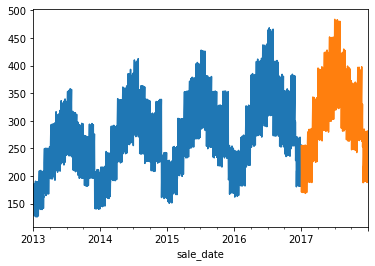

In [13]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

<AxesSubplot:xlabel='month', ylabel='sales_total'>

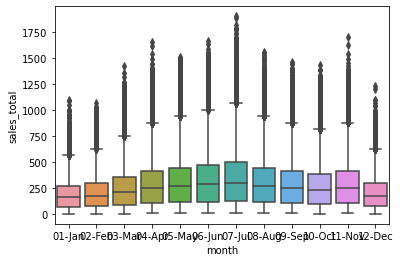

In [8]:
# boxplot for each month
sns.boxplot(data = train, x = 'month', y = 'sales_total')

[Text(0.5, 1.0, 'Average Sales by Day of Week')]

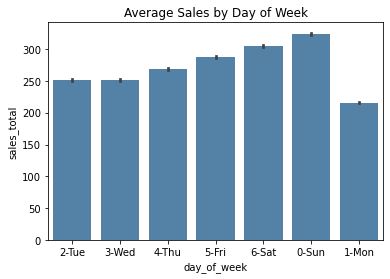

In [9]:
sns.barplot(data=train, x='day_of_week', y='sales_total', color='steelblue')\
    .set(title='Average Sales by Day of Week')

Takeways:
- Increase from Thurs - Sun, Sunday being highest
- Drops off at its lowest on Mon
- Tues and Weds same total

<AxesSubplot:xlabel='sale_date'>

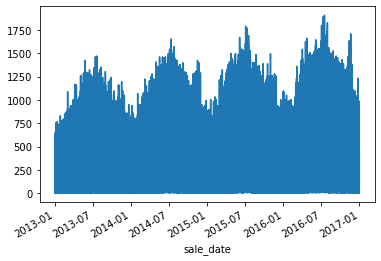

In [10]:
y.plot()

Takeways:

    - sales increase over time

### Resample your data and visualize it.

<AxesSubplot:title={'center':'Quarterly average'}, xlabel='sale_date'>

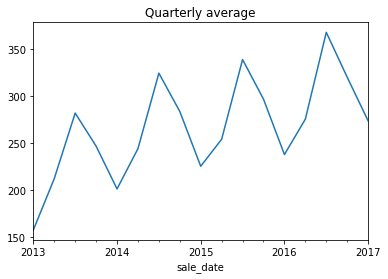

In [11]:
#resampling by quarterly (3 months)
y.resample('3M').mean().plot(title='Quarterly average')

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

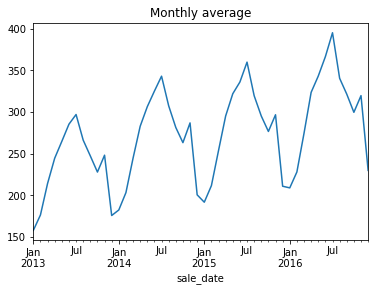

In [12]:
#resampling by month
y.resample('M').mean().plot(title='Monthly average')

In [14]:
### Creating a rolling (moving) average of your data and visualize it.
y = y.resample('D').mean()
y.head()

sale_date
2013-01-01    147.68802
2013-01-02    147.14116
2013-01-03    156.33896
2013-01-04    168.93546
2013-01-05    175.24370
Freq: D, Name: sales_total, dtype: float64

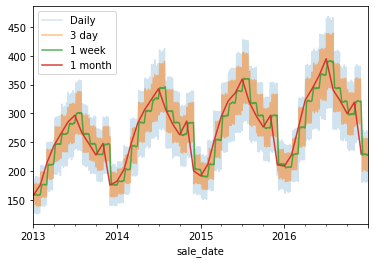

In [15]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
y.resample('M').mean().plot(alpha=.9, label='1 month')
plt.legend()

<AxesSubplot:title={'center':'Daily Difference in Sales Totals'}, xlabel='sale_date'>

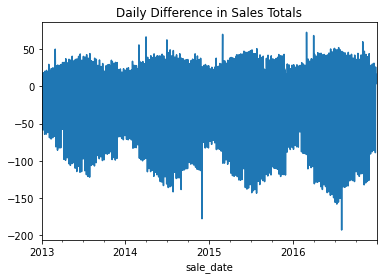

In [16]:
### Plot the difference in sales from one day to the next.
y.diff().plot(title='Daily Difference in Sales Totals')

<AxesSubplot:title={'center':'Daily % Change in Temperature'}, xlabel='sale_date'>

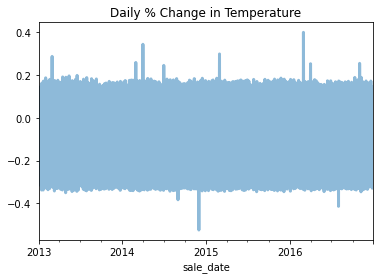

In [17]:
#taking the y.shift()and divide from the diff number it gives us the overall % of the daily sales
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Daily % Change in Temperature')

In [18]:
### Plot the % difference in sales from one week to the next.
#let's try resampling by week
y.resample('W').mean().diff()

sale_date
2013-01-06          NaN
2013-01-13    -3.607964
2013-01-20    -2.034483
2013-01-27     0.598663
2013-02-03     9.039631
                ...    
2016-12-04   -56.861163
2016-12-11   -35.209103
2016-12-18     0.738749
2016-12-25    -0.067643
2017-01-01    -8.951823
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

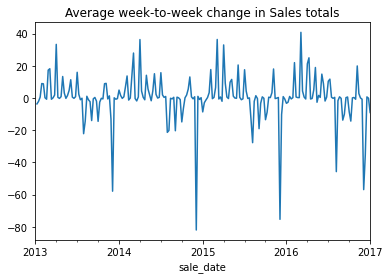

In [19]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in Sales totals');

In [20]:
### Plot the % difference in sales from one month to the next.
#resampling by month
y.resample('M').mean().diff()

sale_date
2013-01-31          NaN
2013-02-28    18.517132
2013-03-31    37.769795
2013-04-30    30.278432
2013-05-31    20.203041
2013-06-30    20.598156
2013-07-31    11.619962
2013-08-31   -30.697866
2013-09-30   -18.945681
2013-10-31   -19.369630
2013-11-30    20.240592
2013-12-31   -72.354964
2014-01-31     6.657099
2014-02-28    20.796331
2014-03-31    41.281869
2014-04-30    38.297100
2014-05-31    23.481447
2014-06-30    18.697838
2014-07-31    17.883724
2014-08-31   -35.503634
2014-09-30   -25.995036
2014-10-31   -18.216658
2014-11-30    23.687264
2014-12-31   -86.282059
2015-01-31    -8.813771
2015-02-28    19.864632
2015-03-31    42.149552
2015-04-30    41.408218
2015-05-31    26.666064
2015-06-30    14.037112
2015-07-31    23.847224
2015-08-31   -40.262332
2015-09-30   -24.347260
2015-10-31   -18.516261
2015-11-30    20.010890
2015-12-31   -85.696837
2016-01-31    -1.985688
2016-02-29    19.076992
2016-03-31    46.389894
2016-04-30    49.094468
2016-05-31    19.524509
2016-0

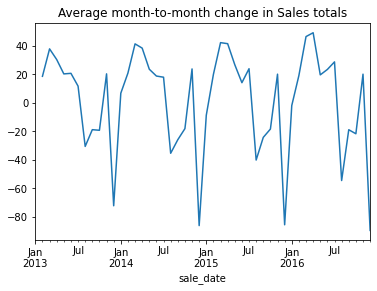

In [21]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Sales totals');

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

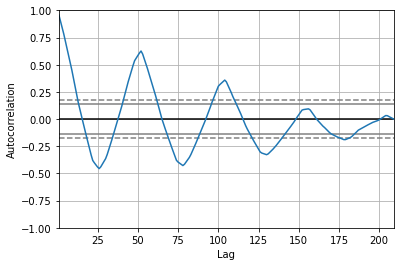

In [22]:
### Visualize an autocorrelation plot on a weekly resampling.
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [23]:
### Visualize a seasonal decomposition plot on a weekly resampling.
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [24]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

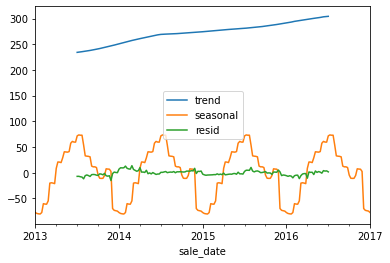

In [25]:
decomposition.iloc[:, 1:].plot()

## OPS Data

## Visualization Options


<AxesSubplot:title={'center':'Frequency of Sales Total'}, ylabel='Frequency'>

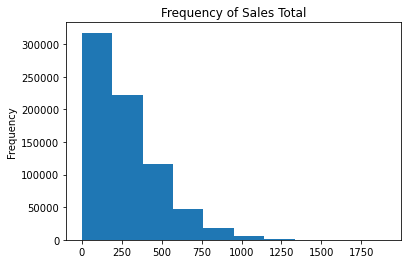

In [26]:
#distributions of target variable 
train.sales_total.plot.hist(title = 'Frequency of Sales Total')

Takeaways:

- Right skewed

<AxesSubplot:xlabel='day_of_week'>

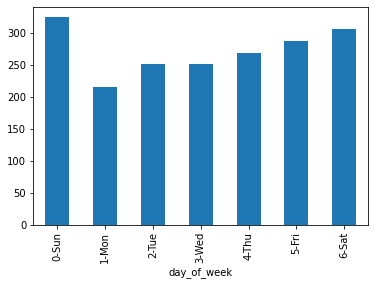

In [27]:
#sales by day of the week 
train.groupby('day_of_week').sales_total.mean().plot.bar()